In [7]:
import pandas as pd
import numpy as np


import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class NeuralNetwork(nn.Module):
    
    def __init__(self, layer_sizes, activation=F.relu):
        super(NeuralNetwork, self).__init__()
        self.linears = nn.ModuleList(
            [nn.Linear(v, layer_sizes[i+1]) for i, v in enumerate(layer_sizes[:-1])]
        )
        self.activation = activation
        
    def forward(self, x):
        for l in self.linears[:-1]:
            x = self.activation(l(x))

        x = self.linears[-1](x)
        x = F.sigmoid(x)
            
        return x

In [9]:
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.Tensor([0, 1, 1, 0]).reshape(-1, 1)

In [10]:
class XORDataset(Dataset):

    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        return self.X[index].to(device), self.y[index].to(device)

In [11]:
xor_data = XORDataset(X, y)
xor_dataloader = DataLoader(xor_data, batch_size=4, shuffle=True)

Final loss = 0.001399109372869134


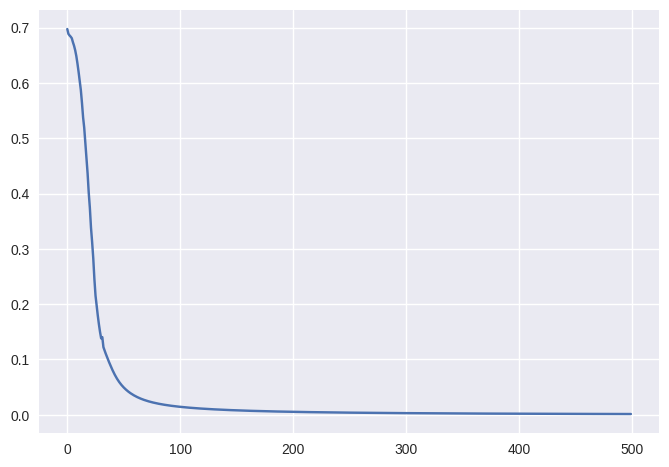

In [18]:
LEARNING_RATE = 0.05
NUM_EPOCHS = 500

layers = [2, 6, 3, 1]
# (2, 6), (6, 3), (3, 1)
xor = NeuralNetwork(layers, activation=F.relu).to(device)
criterion = nn.BCELoss().to(device)
optimizer = torch.optim.Adam(xor.parameters(), lr=LEARNING_RATE)
losses = []

for epoch in range(NUM_EPOCHS):

    for batch_inputs, batch_labels in xor_dataloader:
    
        optimizer.zero_grad()
        outputs = xor(batch_inputs)
        loss = criterion(outputs, batch_labels)
        
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
    

print(f"Final loss = {losses[-1]}")
plt.plot(range(NUM_EPOCHS), losses)
plt.show()

In [19]:
preds = xor(X.to(device))
print(preds)

tensor([[0.0028],
        [1.0000],
        [1.0000],
        [0.0028]], device='cuda:0', grad_fn=<SigmoidBackward0>)
